# 用神经网络来实现逻辑回归
**提示：**
- 没有特殊要求不要在代码中使用循环
- 遇到点积请使用`np.dpt(X, Y)方法`

**这节课你将会学到：**
- 建立深度学习算法的通用结构，包括：
  - 初始化参数
  - 计算代价函数及其参数
  - 使用梯度下降优化算法
- 将以上方法融合到一个主模型函数

## 目录
- [1 - 导包](#1)
- [2 - 习题集概览](#2)
    - [练习 1](#ex-1)
    - [练习 2](#ex-2)
- [3 - 学习算法的总体结构](#3)
- [4 - 实现算法必要步骤](#4)
    - [4.1 - 辅助函数](#4-1)
        - [练习 3 - sigmoid函数](#ex-3)
    - [4.2 - 初始化参数](#4-2)
        - [练习 4 - 初始化0](#ex-4)
    - [4.3 - 前向和后向传播n](#4-3)
        - [练习 5 - 传播](#ex-5)
    - [4.4 - 优化参数](#4-4)
        - [练习 6 - 优化](#ex-6)
        - [练习 7 - 预测](#ex-7)
- [5 - 合并函数到模型](#5)
    - [练习 8 - 模型函数](#ex-8)
- [6 - 进一步分析 (可选/晋升 练习)](#6)
- [7 - 测试用户图片 (可选/晋升 练习)](#7)

<a name='1'></a>
## 1 - 导包
首先我们先到一些我们整个过程中会用到的包
- [numpy](https://numpy.org/doc/1.20/):Python中用于科学计算的基础包
- [h5py](http://www.h5py.org)：H5格式数据处理
- [matplotlib](http://matplotlib.org)：Python中著名画图库
- [PIL](https://pillow.readthedocs.io/en/stable/) 和 [scipy](https://www.scipy.org/) ：用于最后自己图像的测试

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from public_tests import *
# 内嵌绘图，可以直接在你的python console里面生成图像，并且可以省略掉plt.show()这一步。
%matplotlib inline
#在执行用户代码前，重新装入软件的扩展和模块。
%load_ext autoreload
# 装入所有 %aimport 不包含的模块。
%autoreload 2

## 2 - 习题集概览
**习题描述**：本测试数据集("data.h5")包含：
 - 一组已经标记好的图像数据集m_train(是否为猫对应1/0)
 - 一组已经标记好的图像测试集m_test(是否为猫对应1/0)
 - 每一张图像的维度是(num_px, num_px, 3)，其中3意味着3通道(RGB通道)，因此，每个图象都是RGB通道的正方形(长=宽=像素数)
 
你将会建立一个简单的图像识别算法，该算法可以识别图像是否为猫

让我们先熟悉一下图像数据集，运行以下代码以加载数据集

In [2]:
# 加载数据(是否为猫)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

提示：输入变量末的"_orig "下标表示为训练集和测试集的原始输入数据，我们需要将其进行预处理，获取train_set_x和test_set_x(输出相关数据不用处理)

你的每一行train_set_x_origin和test_set_x_origin都是表示一张图像的数列，你可以通过运行以下代码进行图片预览操作(`index`可以任意选择)

y = [1], it's a 'cat' picture.


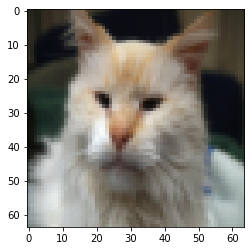

In [3]:
# 图片预览
# 选择图片索引
index = 27
# 画图
plt.imshow(train_set_x_orig[index])
# 画坐标轴
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

在深度学习中，很多软件会因为矩阵/维度不符而产生BUG，如果你能让你的矩阵/维度保持正确，那么你会避免很多BUG的发生

<a name='ex-1'></a>
### 练习1

找到以下内容的值：
 - m_train (训练集样本数)
 - m_test (测试集样本数)
 - num_px (训练图的像素，也等于长和宽)
 
请记住，`train_set_x_orig`是`shape`为(m_train, num_px, num_px, 3)的numpy数组。

你可以通过`train_set_x_orig.shape[0]`来获取`m_train`

In [4]:
#(预计 3 行代码实现)
# m_train = 
# m_test = 
# num_px = 
# 练习代码区-起始位置



# 练习代码区-结束位置

print ("训练集样本数: m_train = " + str(m_train))
print ("测试集样本数: m_test = " + str(m_test))
print ("每张图片的高/宽: num_px = " + str(num_px))
print ("每张图片的大小: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x的shape: " + str(train_set_x_orig.shape))
print ("train_set_y的shape: " + str(train_set_y.shape))
print ("test_set_x的shape: " + str(test_set_x_orig.shape))
print ("test_set_y的shape: " + str(test_set_y.shape))

训练集样本数: m_train = 209
测试集样本数: m_test = 50
每张图片的高/宽: num_px = 64
每张图片的大小: (64, 64, 3)
train_set_x的shape: (209, 64, 64, 3)
train_set_y的shape: (1, 209)
test_set_x的shape: (50, 64, 64, 3)
test_set_y的shape: (1, 50)


**正常情况下，训练集样本数、测试集样本数、图片的长/宽的输出如下**: 
<table style="width:25%">
  <tr>
    <td> 训练集样本数 </td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>测试集样本数</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>图片的长/宽(单位px)</td>
    <td> 64 </td> 
  </tr>
  
</table>


为了方便，你应该将`shape`为`(num_px, num_px, 3)`的图像通过`reshape`转换成`shape`为`(num_px * num_px * 3, 1)`的numpy数组，转换后我们的训练集/测试集就变成了numpy数组，其中每一列都代表着一个平整的图像。数据集对应着有`m_train/m_test`列

<a name='ex-2'></a>
### 练习 2

将训练集和测试集的大小从`(num_px, num_px, 3)`展平成单个向量，即`(num_px * num_px * 3, 1)`

这里有一个小技巧，如果你想把shape为`(a,b,c,d)`的X矩阵转换成shape为`(b*c*d, a)`的X_flatten矩阵，可以使用

```python
X_flatten = X.reshape(X.shape[0], -1).T # X.T就是X的转置
```
#### 解释
`X.reshape(X.shape[0] , -1)`意味着将X进行转换，行数为`X.shape[0]`，列数让系统自己算

因为矩阵元素数量是a*b*c*d，`X.shape[0]`是a，所以系统补的列数为$$\frac{a*b*c*d}{a} = b*c*d$$

所以`X.reshape(X.shape[0],-1)`后的shape为`(a,b*c*d)`，然后再进行转置获得shape为`(b*c*d,a)`

In [5]:
# Reshape训练集和测试机
#(预计 2 行代码实现)
# train_set_x_flatten = ...
# test_set_x_flatten = ...
# 练习代码区-起始位置



# 练习代码区-结束位置

#检查第二张图的前10个像素是否匹配
assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Wrong solution. Use (X.shape[0], -1).T."
assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Wrong solution. Use (X.shape[0], -1).T."

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


**正常情况下的输出**: 

<table style="width:50%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td> 
  </tr>
</table>

为了表示彩色图像，图片中的每个像素都需要与特定的RGB匹配，所以像素对应的值就是三个范围为0-255的数组成的向量

在机器学习中一个常见的预处理步骤就是去集中和标准化你的数据集，也就是让每个样例减去numpy数组的整体平均值，然后让每个样例除标准差

但是这对于图像数据集来说就方便多了，我们只需要让每一行除255(元素最大值)就可以了。

让我们对数据集进行标准化

In [6]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

<font color='blue'>
    
    
**注意:**

一般来说，新数据集的预处理的步骤如下:
- 找到问题的维度与形状(m_train, m_test, num_px, ...)
- Reshape数据集，将其展平为一个向量，每个样本对应的shape为`(num_px \* num_px \* 3, 1)`
- 标准化数据

<a name='3'></a>
## 3 - 学习算法的总体结构 ##

是时候去设计一个识别图是否为猫的算法了

你将要用神经网络的思想去建立逻辑回归，下图将会解释为什么**逻辑回归就是简单的神经网络!**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**算法的数学表达式**:

对于每一个样本 $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

代价函数是借助样本总和进行计算的
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**关键步骤**:

在这次练习中，你需要实现以下步骤: 
   - 初始化模型参数
   - 通过让代价函数值最小化来学习模型参数  
   - 用学习后的参数来(对测试集)做预测
   - 分析结果得出结论

<a name='4'></a>
## 4 - 实现算法必要步骤 ## 

搭建神经网络的主要步骤有:
1. 定义模型结构(比如输入特征的数量)
2. 初始化模型参数
3. 循环操作:
    - 前向传播：计算损失函数(这里用的是loss，我认为应该是cost，存疑)
    - 后向传播：计算当前梯度
    - 梯度下降：更新参数

你经常会分开实现1-3步并将其合并到一个整体模型函数`model()`

<a name='4-1'></a>
### 4.1 - 辅助函数

<a name='ex-3'></a>
### 练习 3 - sigmoid函数
使用Python基础实现`sigmoid()`函数，正如上图所示，你需要实现`sigmoid()`函数，即

$$sigmoid(z) = \frac{1}{1+e^{-z}}$$

其中$$z = w^T x + b$$

小提示:实现$e^{z}$可以借助`np.exp(z)`函数

In [7]:
# 分级函数: sigmoid

def sigmoid(z):
    """
    计算z对应的sigmoid函数值

    Arguments:
    z -- 一个表标量或任意大小的numpy数组

    Return:
    s -- sigmoid(z)
    """

    #(预计 1 行代码实现)
    # s = ...
    # 练习代码区-起始位置
    
  
    
    # 练习代码区-结束位置
    
    return s

In [8]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid_test(sigmoid)

sigmoid([0, 2]) = [0.5        0.88079708]
测试全部通过!


In [9]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


<a name='4-2'></a>
### 4.2 - 初始化参数

<a name='ex-4'></a>
### 练习 4 - 初始化0

在练习中实现参数初始化，你必须要把w初始化为全0向量

如果你不清楚该做什么，可以搜索`np.zeros()`函数

In [10]:
# 分级函数: 初始化0

def initialize_with_zeros(dim):
    """
    这个函数就是创建大小为(dim, 1)的0矩阵，并且初始化b为0
    
    Argument:
    dim -- w向量期望的大小(或者是在这种情况下的参数数量) 
    
    Returns:
    w -- 初始化后的向量，大小为(dim, 1)
    b -- 初始化后的浮点数标量(对应着偏差)
    """
    
    # (预计 2 行代码实现)
    # w = ...
    # b = ...
    # 练习代码区-起始位置
    

    
    # 练习代码区-结束位置

    return w, b

In [11]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

initialize_with_zeros_test(initialize_with_zeros)

w = [[0.]
 [0.]]
b = 0.0
测试全部通过!


<a name='4-3'></a>
### 4.3 - 前向和后向传播

现在你的函数都初始化成功，你可以通过**前向传播**和**后向传播**来学习参数了

<a name='ex-5'></a>
### 练习 5 - 传播
实现`propagate()`函数，该函数用来计算代价函数和它的梯度

**提示**:

前向传播的步骤:
- 得到X
- 计算 $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- 计算代价函数: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

这里有两个会用到的函数: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [12]:
# 分级函数: 传播

def propagate(w, b, X, Y):
    """
    根据刚才解释的先后向传播实现代价函数和对应梯度

    Arguments:
    w -- weights, numpy数组，大小为 (num_px * num_px * 3, 1)
    b -- bias, 偏移量，一个标量
    X -- 输入数据 大小为(num_px * num_px * 3, number of examples)
    Y -- 标记输出向量(是否为猫对应1/0)，大小为(1, number of examples)

    Return:
    cost -- 逻辑回归的代价函数
    dw -- w相关的损失梯度，因此也和w的shape相同
    db -- b相关的损失梯度，因此也和b的shape相同
    
    Tips:
    - 一步一步实现前向传播. np.log(), np.dot()
    - 7月23号public_test.py中的propagate_test()函数出现错误，7月24号已经修复，请注意版本问题
    """
    
    m = X.shape[1]
    
    # 前向传播 (从X到代价函数)
    #(预计 2 行代码实现)
    # 计算激活函数
    # A = ...
    # 计算代价函数(注意要用np.dot. 别用循环求总数)
    # cost = ...                                
    # 练习代码区-起始位置
    

    
    # 练习代码区-结束位置

    # 后向传播 (找梯度)
    #(预计 2 行代码实现)
    # dw = ...
    # db = ...
    # 练习代码区-起始位置
    

    
    # 练习代码区-结束位置
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [13]:
w =  np.array([[1.], [2.]])
b = 2.
X =np.array([[1., 2., -1.], [3., 4., -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

propagate_test(propagate)

dw = [[-0.00154399]
 [-0.00492761]]
db = 0.0014555781367842193
cost = 0.0015453193941501516
测试全部通过!


**期望输出**

```
dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553
```

<a name='4-4'></a>
### 4.4 - 优化参数
- 目前你已经初始化了相关参数
- 你现在也能够去计算代价函数和它对应的梯度了
- 现在你该用梯度下降来更新参数了

<a name='ex-6'></a>
### 练习 6 - 优化
完成优化函数. 调整$w$和$b$来让代价函数$J$降到最小值. 

梯度下降参数$\theta$调整：, $ \theta = \theta - \alpha \text{ } d\theta$, 其中$\alpha$是学习率

In [14]:
# 分级函数: 优化

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    
    通过调整 w 和 b 来实现梯度下降算法
    
    Arguments:
    w -- weights, numpy数组，大小为 (num_px * num_px * 3, 1)
    b -- bias, 偏移量，一个标量
    X -- 输入数据 大小为(num_px * num_px * 3, number of examples)
    Y -- 标记输出向量(是否为猫对应1/0)，大小为(1, number of examples)
    num_iterations -- 循环迭代次数
    learning_rate -- 梯度下降时用到的学习率
    print_cost -- 若为真，则每100步输出一次损失函数
    
    Returns:
    params -- 字典，包含 weights w and bias b
    grads -- 字典，记录了梯度(dw 和 db) 
    costs -- 列表，记录了优化过程中的代价函数值，常被用来画学习曲线
    
    提示:
    一般你需要写下这两步然后进行循环：
        1) 用propagate()函数计算现在参数对应的代价函数值以及对应的梯度
        2) 通过梯度下降更新参数w和b
        
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # (预计 1 行代码实现)
        # 代价函数和梯度计算
        # grads, cost = ...
        # 练习代码区-起始位置
        

        
        # 练习代码区-结束位置
        
        # 获取梯度中对应的导数值
        dw = grads["dw"]
        db = grads["db"]
        
        # 更新参数 (≈ 2 lines of code)
        # w = ...
        # b = ...
        # 练习代码区-起始位置
        

        
        # 练习代码区-结束位置
        
        # 记录代价
        if i % 100 == 0:
            costs.append(cost)
        
            # 每100次训练输出一次代价函数值
            if print_cost:
                print ("迭代 %i 次的代价值: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [15]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

optimize_test(optimize)

w = [[1.0013782 ]
 [2.00439852]]
b = 1.9987008247282243
dw = [[-0.00151883]
 [-0.0048473 ]]
db = 0.0014316083483715582
Costs = [array(0.00154532)]
测试全部通过!


<a name='ex-7'></a>
### 练习 7 - 预测
刚才的函数将会让我们获得学习后的w和b,我们现在能够用w和b去对我们的输入数据集进行预测。
实现`predict()`函数. 该函数需要你实现这两步:

1. 计算 $\hat{Y} = A = \sigma(w^T X + b)$

2. 将结果转换成 0 (若激活值 <= 0.5) 或 1 (若激活值 > 0.5), 将预测结果存储到'Y_prediction'向量（你想用`if/else`的话也可以，但不是很建议）


In [16]:
# 分级函数: 预测

def predict(w, b, X):
    '''
    借助学习好的参数(w, b)来预测结果是0还是1
    
    Arguments:
    w -- weights, numpy数组，大小为 (num_px * num_px * 3, 1)
    b -- bias, 偏移量，一个标量
    X -- 输入数据 大小为(num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- numpy数组(向量)，它包含输入数据X对应的0/1预测值
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # 计算向量A来预测图像是否为猫的可能性
    #(预计 1 行代码实现)
    # A = ...
    # 练习代码区-起始位置
    
    
    
    # 练习代码区-结束位置
    
    for i in range(A.shape[1]):
        
        # 将可能性A[0,i]转换为实际预测p[0,i]
        
        #方法1：(预计 1 行代码实现)  
        #方法2：(预计 4 行代码实现)

        # 练习代码区-起始位置
        

        
        # 练习代码区-结束位置
    
    return Y_prediction

In [17]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predict_test(predict)

predictions = [[1. 1. 0.]]
测试全部通过!


<font color='blue'>
    
**你要记住的是:**
    
你已经实现了以下函数:
- 初始化(w,b)
- 通过迭代学习(w,b)优化了损失函数值:
    - 计算对应的代价函数值和梯度
    - 通过梯度下降来更新参数
- 用学习好的(w,b)来预测之前的输入样本对应的结果

<a name='5'></a>
## 5 - 合并函数到模型 ##

现在我们已经都实现了模型整体上所需要的函数，现在我们开始将其进行合并。


<a name='ex-8'></a>
### 练习 8 - 模型函数

我们开始实现model()函数，这里我们会用到：
 - Y_prediction_test ：测试集预测值 
 - Y_prediction_train ：训练集预测值
 - 我们从optimize()函数获取到的参数，梯度，以及代价函数值

In [18]:
# 分级函数: 模型函数

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    通过调用刚才我们实现的辅助函数来建立逻辑回归模型
    
    Arguments:
    X_train -- 训练集输入数据，用numpy数组表示，shape为(num_px * num_px * 3, m_train)
    Y_train -- 训练集输出数据，用numpy数组表示(或者是一个向量)，shape为(1, m_train)
    X_test -- 测试集输入数据，用numpy数组表示，shape为(num_px * num_px * 3, m_test)
    Y_test -- 测试集输出数据，用numpy数组表示，shape为(1, m_test)
    num_iterations -- 超参数，表示优化参数时的迭代次数
    learning_rate -- 超参数，表示优化参数时的学习率
    print_cost -- 若为真，则每100步输出一次损失函数
    
    Returns:
    d -- 字典，包含模型相关数据
    """
    # (预计 1 行代码实现)   
    # 0初始化参数
    # w, b = ...
    
    
    #(预计 1 行代码实现)
    # 梯度下降
    # params, grads, costs = ...
    
    # 从字典"params"中获取w和b
    # w = ...
    # b = ...
    
    # 预测测试集/训练集数据(预计 2 行代码实现)
    # Y_prediction_test = ...
    # Y_prediction_train = ...
    
    # 练习代码区-起始位置
    

    
    # 练习代码区-结束位置

    # 输出训练集/测试集误差
    if print_cost:
        print("训练集准确率: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("测试集准确率: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [19]:
model_test(model)

测试全部通过!


如果以上测试全部通过，那么我就可以开始训练模型了，请运行以下代码训练你的模型

In [20]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

迭代 0 次的代价值: 0.693147
迭代 100 次的代价值: 0.584508
迭代 200 次的代价值: 0.466949
迭代 300 次的代价值: 0.376007
迭代 400 次的代价值: 0.331463
迭代 500 次的代价值: 0.303273
迭代 600 次的代价值: 0.279880
迭代 700 次的代价值: 0.260042
迭代 800 次的代价值: 0.242941
迭代 900 次的代价值: 0.228004
迭代 1000 次的代价值: 0.214820
迭代 1100 次的代价值: 0.203078
迭代 1200 次的代价值: 0.192544
迭代 1300 次的代价值: 0.183033
迭代 1400 次的代价值: 0.174399
迭代 1500 次的代价值: 0.166521
迭代 1600 次的代价值: 0.159305
迭代 1700 次的代价值: 0.152667
迭代 1800 次的代价值: 0.146542
迭代 1900 次的代价值: 0.140872
训练集准确率: 99.04306220095694 %
测试集准确率: 70.0 %


#### 结论
我们可以从上面看到：

训练集的准确率接近100%，这意味着你的模型对训练数据集来说是高可用的，这非常好！
测试集的准确率为70%，考虑到我们的数据集太少，而且我们的逻辑回归用的是线性分类器，所以这对于简单模型来说也还行。不过不用担心，你会在下周建立更好的分类器！

此外，你也看到了这个模型过度对训练数据过拟合了，之后你会学习到如何减少过拟合(比如用正则化)

在本专门化的后面，您将学习如何减少过拟合，例如使用正则化。使用下面的代码(并更改“index”变量)，您可以查看测试集图片的预测。

你可以通过运行下面的代码，你可以根据`index`变量来查看图片对应的预测

y = 1, you predicted that it is a "cat" picture.


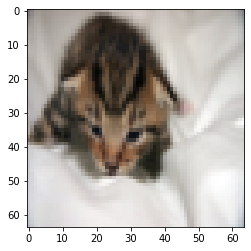

In [21]:
# 错误分类器的图片示例(也就是说它可能不准)
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")


我们画一下 代价函数值-迭代次数 曲线

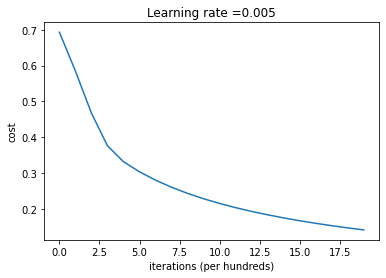

In [22]:
# 绘制学习曲线 (借助代价值)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

**提示**:

从这图你现在能看到代价值下降了，这也意味着我们的参数在学习过程中进行了调整

然而你现在训练模型更侧重在训练集上。试着在原代码的基础上减少迭代次数并重新运行。

你可能会发现训练集精度会更高，而测试集精度会更低，这就是过拟合。

<a name='6'></a>
## 6 - 进一步分析 (可选/晋升 练习) ##

祝贺你搭建了第一个图像分类模型！

现在让我们进一步分析，探究一下学习率$\alpha$的选择吧

#### 学习率的选择 ####

**提示**:
为了更好的进行梯度下降，你必须要明智的选择学习率，学习率决定了我们学习过程中更新参数的快慢。

- 如果学习率太大，容易越过最优解
- 如果学习率太小，迭代又很慢

所以选择一个学习率是非常重要的。

我们来比较一下不同学习率对应的学习曲线变化情况。请运行以下代码(大概会花费1分钟)。

然后随便选择学习率，看看会发生什么变化

训练模型所用学习率：0.01

-------------------------------------------------------

训练模型所用学习率：0.001

-------------------------------------------------------

训练模型所用学习率：0.0001

-------------------------------------------------------



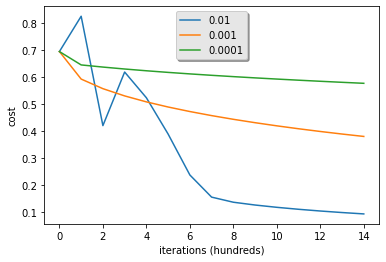

In [23]:
learning_rates = [0.01, 0.001, 0.0001,]
models = {}

for lr in learning_rates:
    print ("训练模型所用学习率：" + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

训练模型所用学习率：0.01

-------------------------------------------------------

训练模型所用学习率：0.001

-------------------------------------------------------

训练模型所用学习率：0.0001

-------------------------------------------------------

训练模型所用学习率：1e-07

-------------------------------------------------------

训练模型所用学习率：1e-05

-------------------------------------------------------



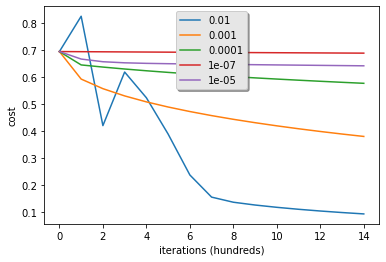

In [24]:
learning_rates = [0.01, 0.001, 0.0001,0.0000001,0.00001]
models = {}

for lr in learning_rates:
    print ("训练模型所用学习率：" + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

训练模型所用学习率：0.01

-------------------------------------------------------

训练模型所用学习率：0.001

-------------------------------------------------------

训练模型所用学习率：0.0001

-------------------------------------------------------

训练模型所用学习率：1e-07

-------------------------------------------------------

训练模型所用学习率：1e-05

-------------------------------------------------------



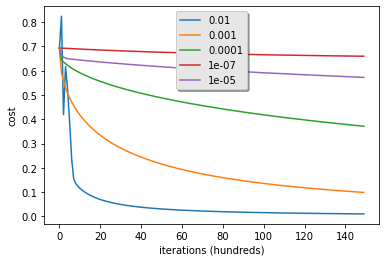

In [25]:
learning_rates = [0.01, 0.001, 0.0001,0.0000001,0.00001]
models = {}

for lr in learning_rates:
    print ("训练模型所用学习率：" + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=15000, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

训练模型所用学习率：0.01

-------------------------------------------------------

训练模型所用学习率：0.001

-------------------------------------------------------

训练模型所用学习率：0.0001

-------------------------------------------------------

训练模型所用学习率：1e-07

-------------------------------------------------------

训练模型所用学习率：1e-05

-------------------------------------------------------



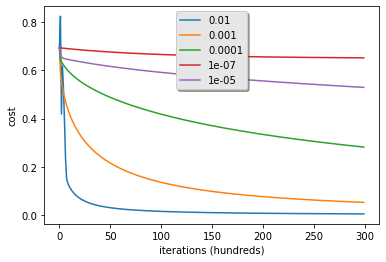

In [26]:
learning_rates = [0.01, 0.001, 0.0001,0.0000001,0.00001]
models = {}

for lr in learning_rates:
    print ("训练模型所用学习率：" + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=30000, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**提示**: 
- 不同的学习率会给出的代价函数值不同因此预测结果也不同
- 如果学习率太大，那么代价函数值在迭代过程中可能会发生震荡，甚至会反向变化(代价函数值变高了)
- 模型不是代价值越低越好，你还得检查是否过拟合(训练集精确度远高于测试集精确度时很容易发生)
- 在深度学习中，我们经常建议您
    - 选择一个能够 更好地减小代价值 的学习率
    - 如果你的模型过拟合，那么用其他的技术来减少过拟合(随后的视频中我们会谈到)

<a name='7'></a>
## 7 - 测试用户图片 (可选/晋升 练习) ##

恭喜你完成任务，你可以用自己的图像来进行预测

如何做呢？

    1. 点击"File"按钮来上传图片文件
    2. 修改`my_image`变量为图片的绝对/相对路径
    3. 运行代码，查看结果(1 = 是猫，0 = 不是猫)

y = 0.0, your algorithm predicts a "non-cat" picture.


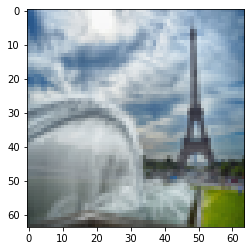

In [27]:
# 改变上传文件的路径
'''
    本机已添加案例
    识别准确案例：
        my_image.jpg->wrong->正确，风景不是猫
        my_image2.jpg->true->正确，一只猫
    识别异常案例(准确率仍需提高)：
        my_image2.jpg->true->错误，鸟不是猫
'''

my_image = "my_image.jpg"   

# 预处理图片以应用算法
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

<font color='blue'>
    
**在这次任务中，我们要记住:**
1. 数据集预处理非常重要
2. 建立模型前你需要分别实现每一个辅助函数y: initialize(), propagate(), optimize(). Then you built a model()
3. 调整学习率对算法有很大影响，你会在随后的课程中看到更多案例！

最后，你还可以尝试以下内容：

    - 调整学习率和迭代次数
    - 尝试不同的初始化方法并比较结果
    - 测试其他预处理工作(数据集中，或每行除标准差)

参考书目：

- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c